In [1]:
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

title=[]
current_price=[]
rating_review=[]
Rating=[]
discount=[]
percentage=[]
rating_count=[]
review_count=[]
capacity=[]
brand=[]
model_type=[]

header ={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36"}

# loop through pages
for i in range(1, 35):
    link = f"https://www.flipkart.com/search?q=refrigerator&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=refrigerator%7CRefrigerators&requestId=c24acc85-2dce-460c-819d-245a22f65228&as-searchtext=refrigerator&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DHaier&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DWhirlpool&p%5B%5D=facets.brand%255B%255D%3DSamsung&p%5B%5D=facets.brand%255B%255D%3DBlue%2BStar&page={i}"

    page = requests.get(url=link, headers=header)
    soup = BeautifulSoup(page.text, "html.parser")

    tp = soup.find_all("div", class_="DOjaWF gdgoEp")

    for block in tp:
        containers = block.find_all("div", class_="tUxRFH")

        for c in containers:
            # Title
            ti = c.find_all("div", class_="KzDlHZ")
            if ti:
                t = ti[0].text.strip()
                title.append(t)

                # --- Brand (first word) ---
                b = t.split()[0]
                brand.append(b)

                # --- Capacity ---
                match = re.search(r"\d+\s*L", t)
                if match:
                    cap = match.group()
                    capacity.append(cap)

                    # remove brand + capacity → model type
                    cleaned = t.replace(b, "", 1).replace(cap, "", 1).strip()
                    model_type.append(cleaned)
                else:
                    capacity.append(np.nan)
                    model_type.append(t.replace(b, "", 1).strip())
            else:
                title.append(np.nan)
                brand.append(np.nan)
                capacity.append(np.nan)
                model_type.append(np.nan)

            # Price
            cp = c.find_all("div", "Nx9bqj _4b5DiR")
            current_price.append(cp[0].text if cp else np.nan)

            # Rating & Reviews
            rr = c.find("span", class_="Wphh3N")
            if rr:
                text = rr.get_text(strip=True).replace("\xa0", " ")
                parts = text.split("&")

                if len(parts) == 2:
                    ratings = parts[0].split(" ")[0]
                    reviews = parts[1].split(" ")[0]
                else:
                    ratings, reviews = np.nan, np.nan
                    
            else:
                ratings, reviews = np.nan, np.nan

            rating_count.append(ratings)
            review_count.append(reviews)

            # Rating
            rating = c.find("div", class_="XQDdHH")
            Rating.append(rating.text if rating else np.nan)

            # Discount
            dic = c.find("div", "yRaY8j ZYYwLA")
            discount.append(dic.text if dic else np.nan)

            # Percentage
            dp = c.find("div", class_="UkUFwK")
            percentage.append(dp.text.strip() if dp else np.nan)


In [2]:
df1 = pd.DataFrame({
    "Brand": brand,
    "Model Type": model_type,
    "Capacity": capacity,
    "MRP": discount,
    "Percentage": percentage,
    "Price": current_price,
    "Star Rating": Rating,
    "Rating_Count": rating_count,
    "Review_Count": review_count  
})

In [4]:
df1

,Brand,Model Type,Capacity,MRP,Percentage,Price,Star Rating,Rating_Count,Review_Count
0,Haier,Direct Cool Single Door 5 Star Refrigerator wi...,215 L,"₹28,090",34% off,"₹18,490",4.4,"21,203","1,563"
1,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,"₹17,700",27% off,"₹12,790",4.3,"24,388","1,463"
2,LG,Direct Cool Single Door 5 Star Refrigerator wi...,185 L,"₹22,699",25% off,"₹16,990",4.4,"9,535",613
3,Whirlpool,Frost Free Triple Door Refrigerator,215 L,"₹32,150",28% off,"₹22,990",4.2,"31,225","2,981"
4,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,"₹15,800",25% off,"₹11,790",4.3,"18,881",978
...,...,...,...,...,...,...,...,...,...
810,Haier,Direct Cool Single Door 5 Star Refrigerator wi...,190 L,"₹24,490",33% off,"₹16,390",4.4,"21,203","1,563"
811,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,"₹15,800",25% off,"₹11,790",4.3,"18,881",978
812,Whirlpool,Frost Free Triple Door Refrigerator,260 L,"₹32,400",17% off,"₹26,589",4.5,198,30
813,Samsung,Frost Free Double Door 3 Star Convertible Refr...,236 L,NaN,NaN,"₹44,884",4.5,6,0


## EDA

## Step1 : Data Cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         815 non-null    object
 1   Model Type    815 non-null    object
 2   Capacity      813 non-null    object
 3   MRP           773 non-null    object
 4   Percentage    771 non-null    object
 5   Price         813 non-null    object
 6   Star Rating   725 non-null    object
 7   Rating_Count  725 non-null    object
 8   Review_Count  725 non-null    object
dtypes: object(9)
memory usage: 57.4+ KB


In [6]:
df1.isna().sum()

Brand            0
Model Type       0
Capacity         2
MRP             42
Percentage      44
Price            2
Star Rating     90
Rating_Count    90
Review_Count    90
dtype: int64

In [7]:
# Clean MRP
df1["MRP"] = (
    df1["MRP"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

In [8]:
df1["MRP"] = pd.to_numeric(df1["MRP"], errors="coerce")

In [9]:
# Clean Price
df1["Price"] = (
    df1["Price"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

In [10]:

df1["Price"] = pd.to_numeric(df1["Price"], errors="coerce")

In [11]:

# Clean Percentage (remove "% off")
df1["Percentage"] = (
    df1["Percentage"]
    .str.replace("% off", "", regex=False)
    .str.strip()
)
df1["Percentage"] = pd.to_numeric(df1["Percentage"], errors="coerce")

In [12]:
# Clean Rating_Count
df1["Rating_Count"] = (
    df1["Rating_Count"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df1["Rating_Count"] = pd.to_numeric(df1["Rating_Count"], errors="coerce").astype("Int64")

In [13]:
# Clean Review_Count
df1["Review_Count"] = (
    df1["Review_Count"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df1["Review_Count"] = pd.to_numeric(df1["Review_Count"], errors="coerce").astype("Int64")

In [14]:
# Clean Star Rating
df1["Star Rating"] = pd.to_numeric(df1["Star Rating"], errors="coerce")

In [15]:
df1.isna().sum()

Brand            0
Model Type       0
Capacity         2
MRP             42
Percentage      44
Price            2
Star Rating     90
Rating_Count    90
Review_Count    90
dtype: int64

## Filling values

In [16]:
# Fill missing numeric columns with 0 or median
df1["Capacity"] = df1["Capacity"].fillna(df1["Capacity"].mode())

In [17]:
df1["Percentage"] = df1["Percentage"].fillna(0)
df1["Star Rating"] = df1["Star Rating"].fillna(0)
df1["Rating_Count"] = df1["Rating_Count"].fillna(0)
df1["Review_Count"] = df1["Review_Count"].fillna(0)

In [18]:
a=df1['Price'].mode()[0]
a

np.float64(18490.0)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df1['Price'].fillna(method='bfill')


0      18490.0
1      12790.0
2      16990.0
3      22990.0
4      11790.0
        ...   
810    16390.0
811    11790.0
812    26589.0
813    44884.0
814    21922.0
Name: Price, Length: 815, dtype: float64

In [21]:
df1['MRP']=df1['MRP'].fillna(method='bfill')

In [22]:
df1['Capacity']=df1['Capacity'].fillna(method='bfill')

In [23]:
df1.isna().sum()

Brand           0
Model Type      0
Capacity        0
MRP             0
Percentage      0
Price           2
Star Rating     0
Rating_Count    0
Review_Count    0
dtype: int64

In [24]:
df1.to_csv("flipkart_refrigerators_clean1.csv", index=False)

In [25]:
df2=pd.read_csv("flipkart_refrigerators_clean1.csv")
df2

,Brand,Model Type,Capacity,MRP,Percentage,Price,Star Rating,Rating_Count,Review_Count
0,Haier,Direct Cool Single Door 5 Star Refrigerator wi...,215 L,28090.0,34.0,18490.0,4.4,21203,1563
1,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,17700.0,27.0,12790.0,4.3,24388,1463
2,LG,Direct Cool Single Door 5 Star Refrigerator wi...,185 L,22699.0,25.0,16990.0,4.4,9535,613
3,Whirlpool,Frost Free Triple Door Refrigerator,215 L,32150.0,28.0,22990.0,4.2,31225,2981
4,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,15800.0,25.0,11790.0,4.3,18881,978
...,...,...,...,...,...,...,...,...,...
810,Haier,Direct Cool Single Door 5 Star Refrigerator wi...,190 L,24490.0,33.0,16390.0,4.4,21203,1563
811,Whirlpool,Direct Cool Single Door 2 Star Refrigerator,184 L,15800.0,25.0,11790.0,4.3,18881,978
812,Whirlpool,Frost Free Triple Door Refrigerator,260 L,32400.0,17.0,26589.0,4.5,198,30
813,Samsung,Frost Free Double Door 3 Star Convertible Refr...,236 L,24999.0,0.0,44884.0,4.5,6,0


In [26]:
df2.isnull().sum()

Brand           0
Model Type      0
Capacity        0
MRP             0
Percentage      0
Price           2
Star Rating     0
Rating_Count    0
Review_Count    0
dtype: int64

### Analysis

#### Summary Statistics

### Number of Refrigerators per Brand

In [27]:
df2["Brand"].unique()

array(['Haier', 'Whirlpool', 'LG', 'Samsung'], dtype=object)

In [28]:
df2['Brand'].value_counts()

Brand
Whirlpool    329
Haier        267
Samsung      135
LG            84
Name: count, dtype: int64

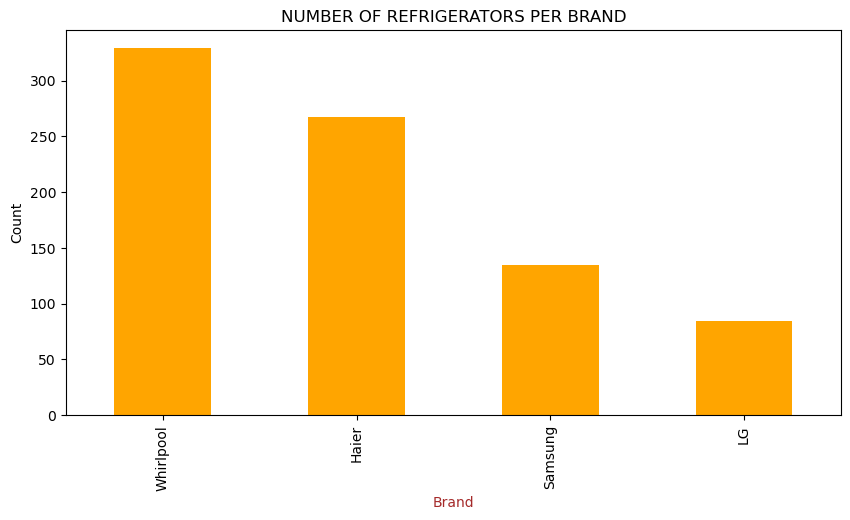

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))   

order=df1["Brand"].value_counts()
order.plot(kind='bar',color='orange')

plt.title("NUMBER OF REFRIGERATORS PER BRAND")   
plt.xlabel("Brand",color='brown')                              
plt.ylabel("Count",color='black')                              
plt.show()


#### Average Price per Brand

In [30]:
# Compute average price per brand
avg_price_brand = df1.groupby("Brand")["Price"].mean().sort_values(ascending=False).reset_index()
avg_price_brand["Price"] = avg_price_brand["Price"].round(2)
print(avg_price_brand)

       Brand     Price
0    Samsung  37579.39
1         LG  37551.87
2      Haier  25363.09
3  Whirlpool  18890.21


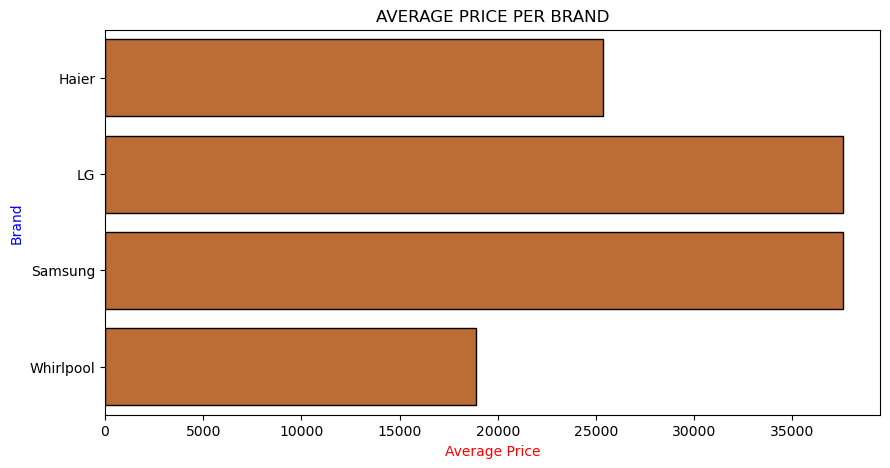

In [31]:
plt.figure(figsize=(10,5))  
avg_price = df2.groupby("Brand")["Price"].mean().reset_index()


sns.barplot(
    x="Price", 
    y="Brand", 
    data=avg_price, 
    color="chocolate",       
    edgecolor="black"     
)

plt.title("AVERAGE PRICE PER BRAND")   
plt.xlabel("Average Price",color='red')            
plt.ylabel("Brand",color='blue')                    
                     

plt.show()


### HIGHEST PRICE IN EACH BRAND

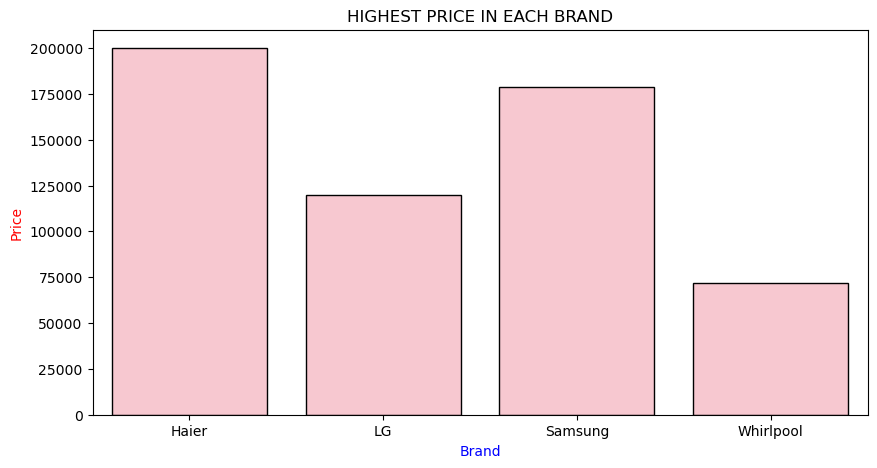

In [32]:
plt.figure(figsize=(10,5))  
max_price = df2.groupby("Brand")["Price"].max().reset_index()
sns.barplot(
    y="Price", 
    x="Brand", 
    data=max_price, 
    color="pink",       
    edgecolor="black"     
)

plt.title("HIGHEST PRICE IN EACH BRAND")   
plt.ylabel("Price",color='red')            
plt.xlabel("Brand",color='blue')                    
                     

plt.show()


## HIGHEST RATINGS PER BRAND

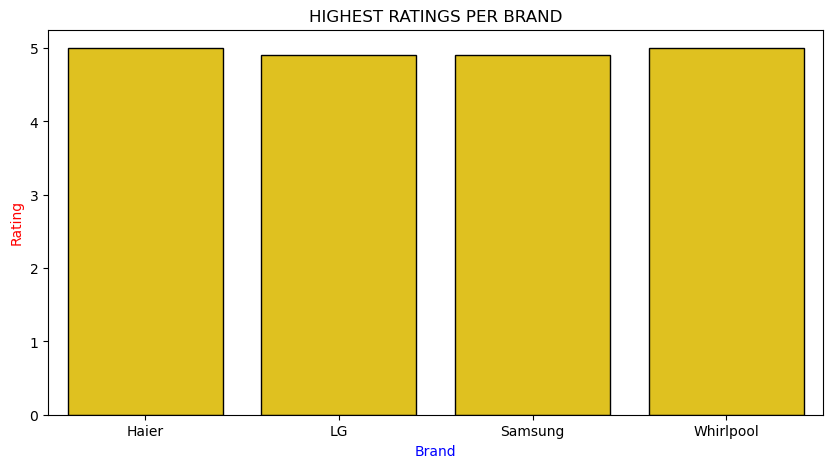

In [33]:
plt.figure(figsize=(10,5))  
avg_price = df2.groupby("Brand")["Star Rating"].max().reset_index()


sns.barplot(
    y="Star Rating", 
    x="Brand", 
    data=avg_price, 
    color="gold",       
    edgecolor="black"     
)

plt.title("HIGHEST RATINGS PER BRAND")   
plt.ylabel("Rating",color='red')            
plt.xlabel("Brand",color='blue')                    
                     

plt.show()


## PRICE DISTIBUTION


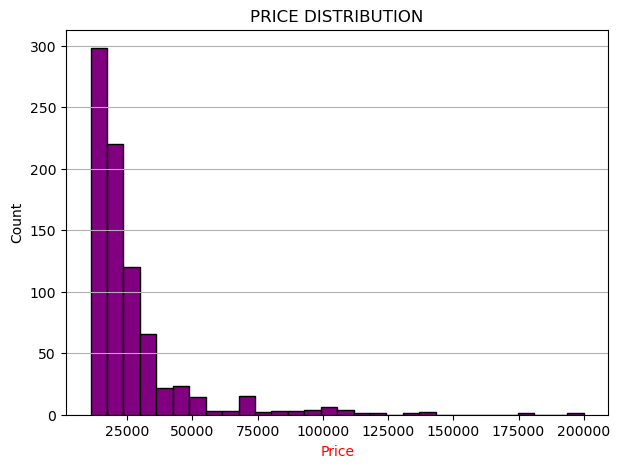

In [34]:
plt.figure(figsize=(7,5))
plt.hist(df2["Price"], bins=30,color='purple', edgecolor="black")
plt.title("PRICE DISTRIBUTION")
plt.xlabel("Price",color='red')
plt.grid(axis='y')
plt.ylabel("Count")
plt.show()

## Capacity vs Price

In [ ]:
# Convert Capacity column to numeric (remove " L")
df2["Capacity_num"] = df2["Capacity"].str.replace(" L", "", regex=False).astype(float)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Capacity_num", 
    y="Price", 
    hue="Brand", 
    data=df2, 
    alpha=0.6, 
    palette="Set2", 
    s=80  # marker size
)
plt.xlabel("Capacity (Litres)", fontsize=15, color="g")
plt.ylabel("Price", fontsize=15, color="r")
plt.title("CAPACITY VS PRICE", fontsize=16)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## Star Rating Distribution

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="Star Rating", data=df2,color='green')

plt.xlabel("Star Rating", fontsize=14, color="cyan")
plt.ylabel("Number of Products", fontsize=14, color="magenta")
plt.title("STAR RATING DISTRIBUTION", fontsize=16)
plt.yticks(range(0,250,10))
plt.xticks(rotation=45)   # Rotate x-axis labels if needed
plt.show()



## Top 3 Brands by Number of Products

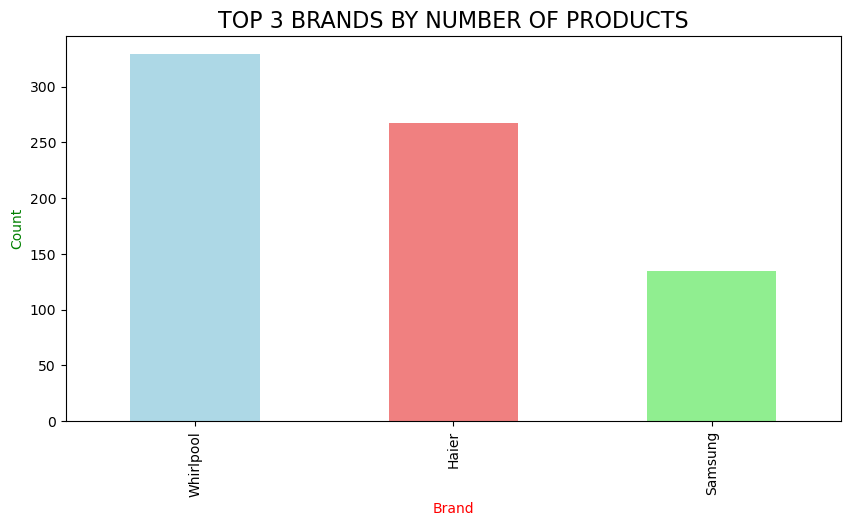

In [38]:
plt.figure(figsize=(10,5))
df2["Brand"].value_counts().head(3).plot(kind="bar", color=['lightblue','lightcoral','lightgreen'])
plt.title("TOP 3 BRANDS BY NUMBER OF PRODUCTS", fontsize=16)
plt.xlabel("Brand",color='red')
plt.ylabel("Count",color='green')
plt.show()


### PRICE BY BRAND

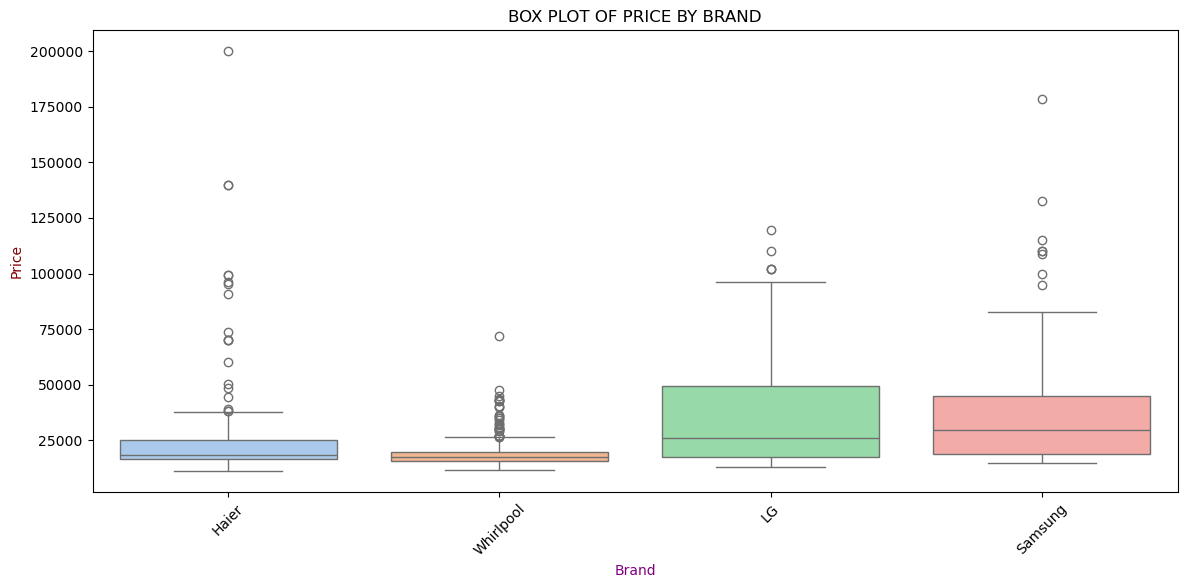

In [37]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='Price', data=df2, palette='pastel')

plt.title('BOX PLOT OF PRICE BY BRAND')
plt.xlabel('Brand',color='purple')
plt.ylabel('Price',color='maroon')
plt.xticks(rotation=45) 
plt.show()

## Correlation Heatmap

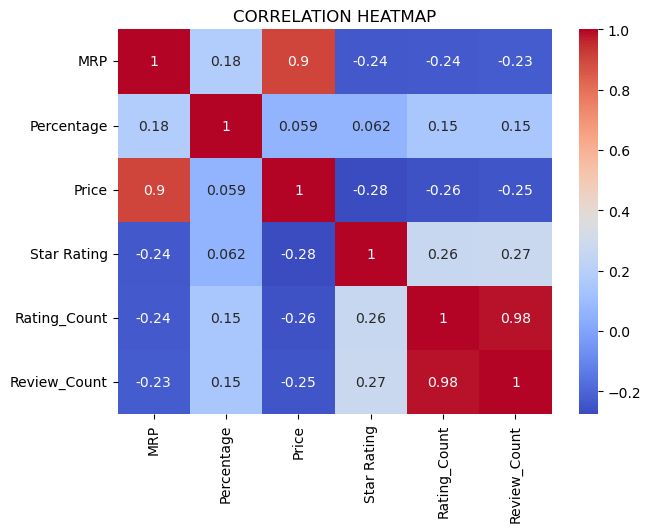

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()